In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, multivariate_normal, weibull_min, gamma
from mpl_toolkits.mplot3d import Axes3D

from REStats.models.weibull import plot_prior_samples
from REStats.plots import save_figs

In [2]:
sns.set_theme()

In [3]:
figs = {}
SAVE_FIGS = True

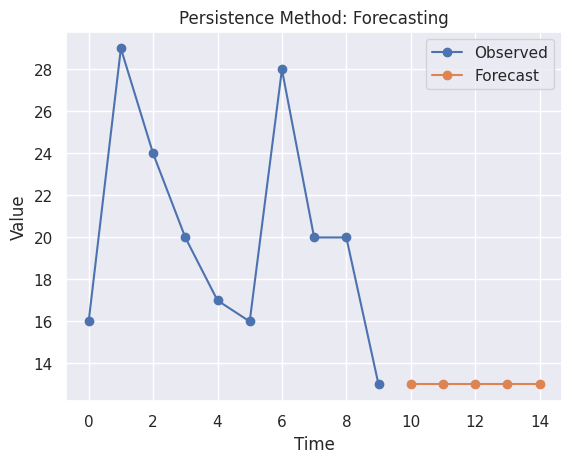

In [4]:

# Generate example data
np.random.seed(42)
observed_values = np.random.randint(low=10, high=30, size=10)

# Persistence forecasting
forecast_values = [observed_values[-1]] * 5

# Plotting
plt.plot(np.arange(len(observed_values)), observed_values, marker='o', label='Observed')
plt.plot(np.arange(len(observed_values), len(observed_values) + len(forecast_values)),
         forecast_values, marker='o', label='Forecast')

# Labeling and formatting
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Persistence Method: Forecasting')
plt.legend()

fig = plt.gcf()

figs["per_example"] = fig

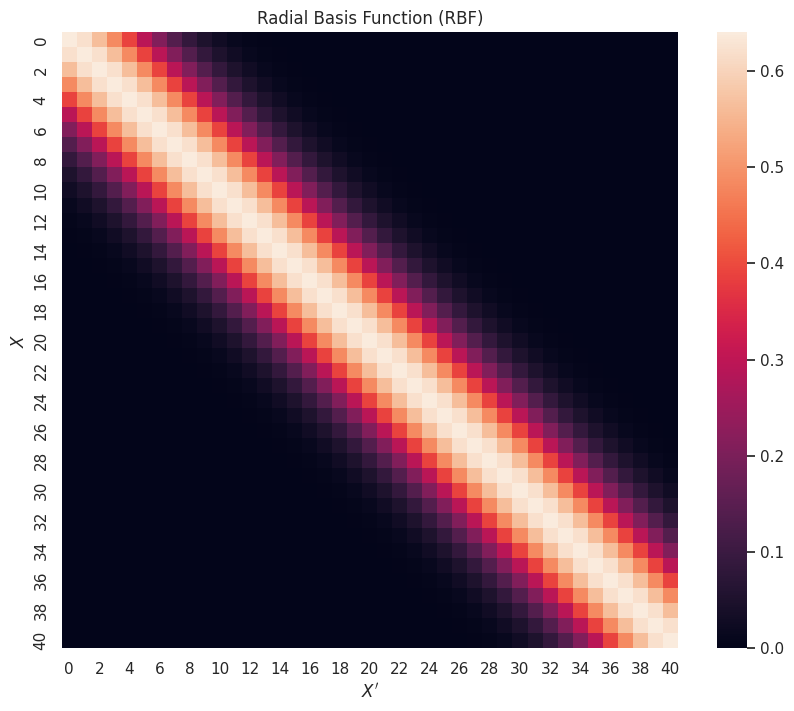

In [5]:
# define the Gaussian RBF
def rbf(x, y, sigma, l):
    return sigma ** 2 * np.exp(-(x-y)**2/(2*l**2))

# generate grid
x1, x2 = np.mgrid[-5:5.25:.25, -5:5.25:.25]

# compute RBF values
z = rbf(x1, x2, 0.8, 1)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(z, ax=ax)
ax.set_aspect("equal")
ax.set_title("Radial Basis Function (RBF)")
ax.set_xlabel("$X\'$")
ax.set_ylabel("$X$")

figs["rbf_heatmap"] = fig

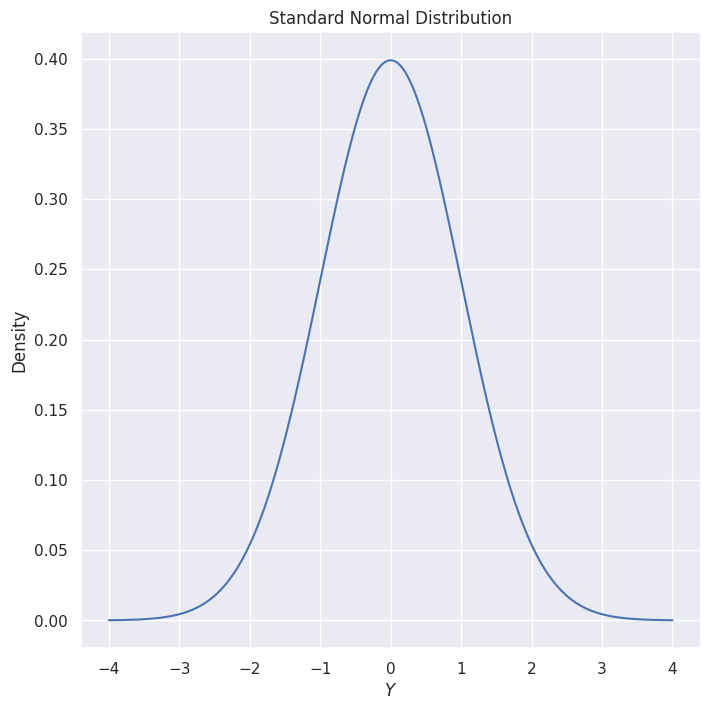

In [6]:
# generate data
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # 0 is the mean, 1 is the standard deviation

fig = plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.title("Standard Normal Distribution")
plt.xlabel("$Y$")
plt.ylabel("Density")

figs["std_normal_example"] = fig

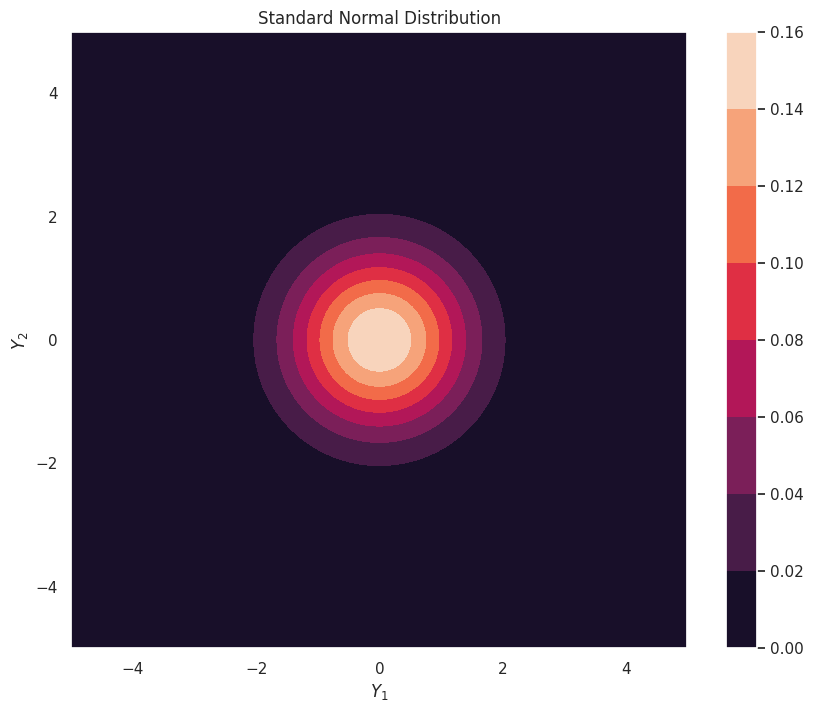

In [7]:
# generate grid
x, y = np.mgrid[-5:5:.01, -5:5:.01]
pos = np.dstack((x, y))

# create a 2D standard normal distribution
rv = multivariate_normal([0, 0], [[1, 0], [0, 1]])

# plot the 2D distribution
fig = plt.figure(figsize=(10, 8))  # change the figure size to be square
ax = fig.add_subplot(111, aspect='equal')  # add aspect='equal' to make the axes square
plt.contourf(x, y, rv.pdf(pos))
plt.colorbar()
plt.title("Standard Normal Distribution")
plt.xlabel("$Y_1$")
plt.ylabel("$Y_2$")

figs["mv_normal_example"] = fig

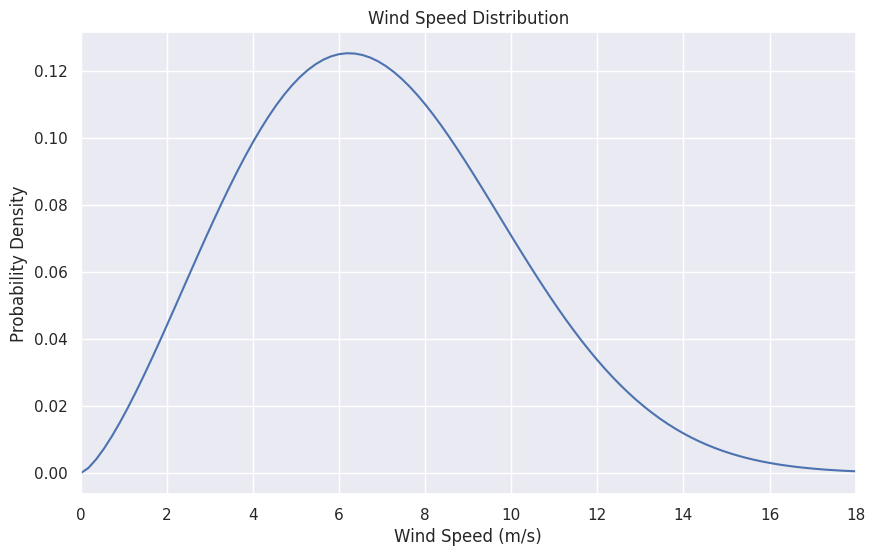

In [8]:
# Parameters for the Weibull distribution
shape_param = 2.4  # This is also known as the "k" parameter
scale_param = 7.8  # This is also known as the "lambda" parameter

# Generate the x values
x = np.linspace(0, 18, 100)

# Generate the Weibull pdf values
pdf_values = weibull_min.pdf(x, shape_param, scale=scale_param)

# Generate a plot of the Weibull pdf
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xmargin(0)
ax.plot(x, pdf_values)

# Label the plot
ax.set_title("Wind Speed Distribution")
ax.set_xlabel('Wind Speed (m/s)')
ax.set_ylabel('Probability Density')

figs["weibull_example"] = fig

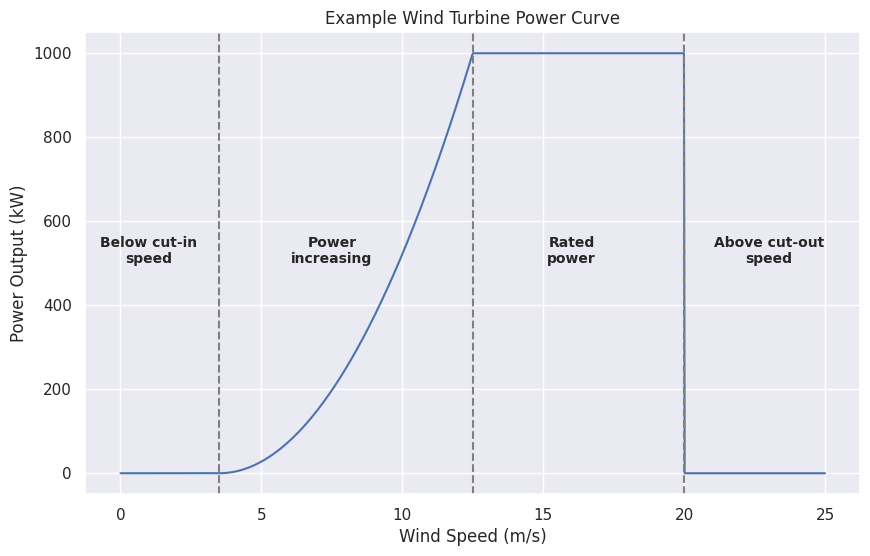

In [9]:
# define wind speeds and power
wind_speed = np.linspace(0, 25, 1000)  # wind speed in m/s
rated_power = 1000  # rated power in kW
cut_in_speed = 3.5  # in m/s
rated_wind_speed = 12.5  # in m/s
cut_out_speed = 20  # in m/s

# calculate power output
power_output = np.piecewise(wind_speed,
                            [wind_speed < cut_in_speed,
                             (wind_speed >= cut_in_speed) & (wind_speed < rated_wind_speed),
                             (wind_speed >= rated_wind_speed) & (wind_speed < cut_out_speed),
                             wind_speed >= cut_out_speed],
                            [0,
                             lambda x: ((rated_power / (rated_wind_speed - cut_in_speed)**2) * 
                                        (x - cut_in_speed)**2),
                             rated_power,
                             0])

# plot power curve
fig = plt.figure(figsize=(10, 6))
plt.plot(wind_speed, power_output)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power Output (kW)")
plt.title("Example Wind Turbine Power Curve")

# add vertical lines to denote regions
plt.axvline(x=cut_in_speed, linestyle='--', color='gray')
plt.axvline(x=rated_wind_speed, linestyle='--', color='gray')
plt.axvline(x=cut_out_speed, linestyle='--', color='gray')

# annotate regions
plt.text(1, 500, 'Below cut-in\nspeed', fontsize=10, weight='bold', ha='center')
plt.text(7.5, 500, 'Power\nincreasing', fontsize=10, weight='bold', ha='center')
plt.text(16, 500, 'Rated\npower', fontsize=10,  weight='bold', ha='center')
plt.text(23, 500, 'Above cut-out\nspeed', fontsize=10, weight='bold', ha='center')

figs["wt_regions"] = fig

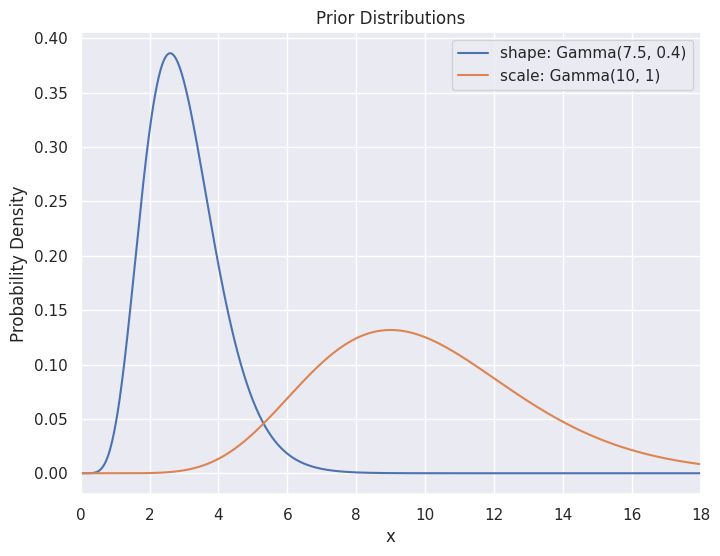

In [10]:
x = np.linspace(0, 18, 1000)

# parameters for Gamma distributions
params = [(7.5, .4), (10, 1)] 

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xmargin(0)

names = ("shape", "scale")

for i, (a, scale) in enumerate(params):
    y = gamma.pdf(x, a=a, scale=scale)
    ax.plot(x, y, label=f'{names[i]}: Gamma({a}, {scale})')

ax.set_xlabel('x')
ax.set_ylabel('Probability Density')
ax.set_title('Prior Distributions')
ax.legend()

figs["wb_gamma"] = fig

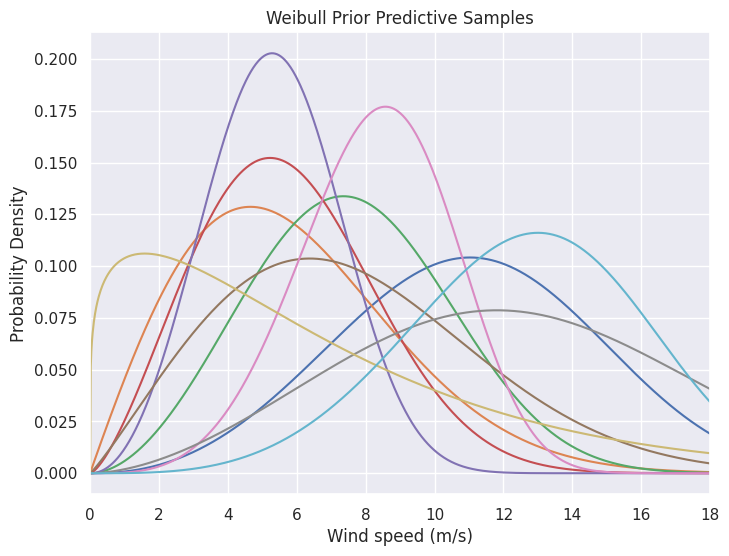

In [11]:
import numpy as np
import matplotlib.pyplot as plt



# visualize samples from Weibull distributions with Gamma(2, 0.5) priors for both shape and scale
fig = plot_prior_samples(shape_prior_params=params[0], scale_prior_params=params[1], num_samples=10)

figs["wb_prior"] = fig

In [12]:
if SAVE_FIGS:
    save_figs(figs, format="svg")
    save_figs(figs, format="pdf")